In [3]:
### Importing all necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk


In [4]:
## Read the data from reviews file.

df=pd.read_csv("flipkart_reviews.csv")

In [5]:
## Viewing the top 5 records 

df.head()

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5.0
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5.0
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5.0
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5.0
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5.0


In [6]:
## Viewing the shape

df.shape

(2304, 3)

In [7]:
### Dropping the null values.

df.dropna(inplace=True)

In [8]:
### View the shape.

df.shape

(2303, 3)

In [9]:
##counts=pd.DataFrame(df['Rating'].value_counts(),columns=['rating','rat_count'])
##value_count = df['Rating'].value_counts().rename_axis('unique_values').reset_index('counts')

### Converting Rating value-counts to a dataframe 


value_count = df['Rating'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [10]:
value_count

,unique_values,counts
0,5.0,1381
1,4.0,552
2,1.0,184
3,3.0,140
4,2.0,46


In [11]:
value_count['unique_values']

0    5.0
1    4.0
2    1.0
3    3.0
4    2.0
Name: unique_values, dtype: float64

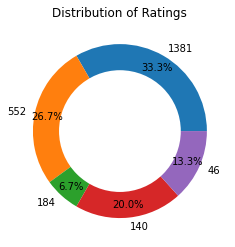

In [12]:
### Drawing a Donut Chart.

plt.pie(value_count['unique_values'],  labels=value_count['counts'],
        autopct='%1.1f%%', pctdistance=0.85)

## Draw Circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

## Adding circle to pie chart
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Ratings')

plt.show()

In [20]:
### Calculating the sentiment scores using Analyzer.

analyzer = SentimentIntensityAnalyzer()
df.drop(['Product_name','Rating'],axis=1,inplace=True)
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['Review']]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['Review']]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['Review']]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['Review']]

In [21]:
df

,Review,compound,neg,neu,pos
0,Best under 60k Great performanceI got it for a...,0.9579,0.073,0.613,0.314
1,Good perfomence...,0.4404,0.000,0.256,0.744
2,Great performance but usually it has also that...,0.5789,0.000,0.881,0.119
3,My wife is so happy and best product 👌🏻😘,0.8808,0.000,0.432,0.568
4,"Light weight laptop with new amazing features,...",0.8360,0.000,0.533,0.467
...,...,...,...,...,...
2298,"Cool and best in below 9000 prize range ,go fo...",0.8689,0.000,0.449,0.551
2299,"Great display, accurate colours at this price ...",0.6249,0.000,0.631,0.369
2300,Superb monitor first brought 1 used for 2 mont...,0.6249,0.000,0.745,0.255
2301,Awesome,0.6249,0.000,0.000,1.000


In [29]:
## Calculate the sum of their respective scores 

Positive=df['pos'].sum()
Negative=df['neg'].sum()
Neutral=df['neu'].sum()

In [30]:
### Dispaly the total Score.

print(f"Total Postitive Score is :{Positive:0.2f}")
print(f"Total Negative Score is :{Negative:0.2f}")
print(f"Total Neutral Score is :{Neutral:0.2f}")

Total Postitive Score is :835.34
Total Negative Score is :104.92
Total Neutral Score is :1362.74
